In [1]:
from lammps_file_writer import *
from support import *
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

from scipy.spatial import Delaunay

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(3,2))

/home/hapless/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


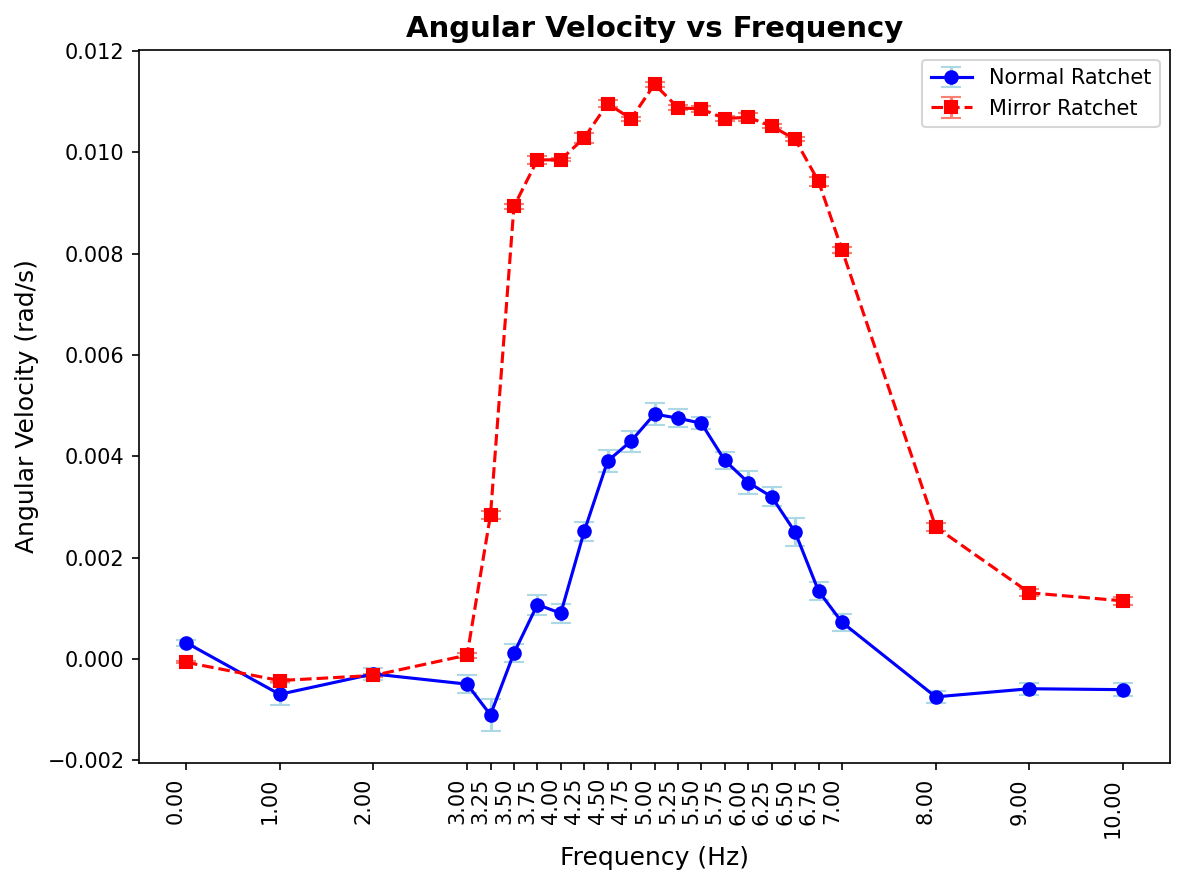

In [11]:
# Tus datos

dir3 = r"/home/hapless/Documents/Projects/week8/files_50M/"
dir4 = r"/home/hapless/Documents/Projects/week8/files_50M_mirror/"

freqs = read_seeds(dir4+'freqs')

frequencies = np.array([])

for freq in freqs:
    frequencies = np.append(frequencies, float(freq))
    

velocity_per_freq_normal = np.load(dir3+'velocity_per_freq.npy')
error_per_freq_normal = np.load(dir3+'error_per_freq.npy')

velocity_per_freq_mirror = np.load(dir4+'velocity_per_freq.npy')
error_per_freq_mirror = np.load(dir4+'error_per_freq.npy')

# Crear una sola figura con un solo eje
plt.figure(figsize=(8, 6))

# Graficar ambos conjuntos de datos en el mismo eje
plt.errorbar(
    frequencies,
    velocity_per_freq_normal,
    yerr=error_per_freq_normal,
    fmt='o-',  # Marcadores circulares con línea continua
    color='blue',
    ecolor='lightblue',  # Color de las barras de error
    capsize=5,     # Tamaño de las líneas horizontales en las barras de error
    label='Normal Ratchet'
)

plt.errorbar(
    frequencies,
    velocity_per_freq_mirror,
    yerr=error_per_freq_mirror,
    fmt='s--',  # Marcadores cuadrados con línea discontinua
    color='red',
    ecolor='salmon',
    capsize=5,
    label='Mirror Ratchet'
)

# Configuración del gráfico
plt.title('Angular Velocity vs Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Angular Velocity (rad/s)', fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.xticks(frequencies, rotation=90, ha="right")

# Ajustar diseño y mostrar figura
plt.tight_layout()
plt.show()# Tus datos